## Student name: Roja Kamble, 11454258
## Assignment: 4

### Part 1: Data Wrangling
You have to write code to answer the questions below

* Import pandas library
* Read the data stored in your local machine https://www.kaggle.com/datasets/yasserh/student-marks-dataset
* Name the variable df

### Show information about the dataset

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/roja/Downloads/Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


### Show the last 10 rows

In [7]:
rows = df.tail(10)
rows

,number_courses,time_study,Marks
90,7,4.182,24.394
91,8,2.730,19.564
92,4,5.027,23.916
93,8,6.471,42.426
94,8,3.919,24.451
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


### Reset the index such that it starts from 1 (instead of 0)

In [8]:
df.index = np.arange(1, len(df) + 1)
df

,number_courses,time_study,Marks
1,3,4.508,19.202
2,4,0.096,7.734
3,4,3.133,13.811
4,6,7.909,53.018
5,8,7.811,55.299
...,...,...,...
96,6,3.561,19.128
97,3,0.301,5.609
98,4,7.163,41.444
99,7,0.309,12.027


### Lowercase all columns

In [9]:
# Basically column heads are already lowercase except 'Marks'column

t1 = pd.read_csv('/Users/roja/Downloads/Student_Marks.csv')
t1.head()
t1.columns = t1.columns.str.lower()
t1


,number_courses,time_study,marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [10]:
# Uppercase all columns

t2 = pd.read_csv('/Users/roja/Downloads/Student_Marks.csv')
t2.head()
t2.columns = t2.columns.str.upper()
t2

,NUMBER_COURSES,TIME_STUDY,MARKS
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


### Return a boolean value indicating whether the dataset has missing values

In [11]:
df.isnull()

,number_courses,time_study,Marks
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
96,False,False,False
97,False,False,False
98,False,False,False
99,False,False,False


### Show average of all columns grouped by number_course in a same DataFrame table

In [12]:
avg = df.groupby(['number_courses']).mean()
avg

,time_study,Marks
number_courses,,
3,3.685773,18.433318
4,3.598524,19.029952
5,3.070600,17.641000
6,4.838750,29.863062
7,4.242667,29.401467
8,4.955750,33.835375


### Show the sum of time_study and mean of marks grouped by each number_course in a same DataFrame table

In [13]:
df.mean()

number_courses     5.29000
time_study         4.07714
Marks             24.41769
dtype: float64

In [14]:
sum = df.groupby(['number_courses'])['time_study'].sum()
sum


number_courses
3    81.087
4    75.569
5    30.706
6    77.420
7    63.640
8    79.292
Name: time_study, dtype: float64

In [15]:
mean = df.groupby(['number_courses'])['Marks'].mean()
mean

number_courses
3    18.433318
4    19.029952
5    17.641000
6    29.863062
7    29.401467
8    33.835375
Name: Marks, dtype: float64

In [16]:
pip install -U prettytable

Note: you may need to restart the kernel to use updated packages.


In [17]:
from prettytable import PrettyTable

res = PrettyTable([sum, mean])
res

"number_courses3 81.0874 75.5695 30.7066 77.4207 63.6408 79.292Name: time_study, dtype: float64","number_courses3 18.4333184 19.0299525 17.6410006 29.8630627 29.4014678 33.835375Name: Marks, dtype: float64"


### Write a class My_KMeans that implements k-means clustering algorithm. You are required to have the following attributes
* Parameters:
    * Default clusters
    * max_iter
* Method:
    * fit
    * predict

<br> Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br> **Using a pre-built library yields no credit. You have to write everything from scratch**

In [18]:
import math
import numpy as np

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class My_KMeans:
    
    l= []
    
    def __init__(self, n_clusters = 3, max_iter = 100):
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids =0
        
    def fit(self, X_train):
        
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [np.random.uniform(min_, max_) for _ in range(self.n_clusters)]
        iteration = 0
        
        prev_centroids = None
        
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
            
    def predict(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            t = self.centroids[centroid_idx]
            centroids.append(t)
            centroid_idxs.append(centroid_idx)
        cluster_centers_ = centroid_idxs
        self.l = centroid_idxs
        return centroid_idxs
            
            
 

### Run the code

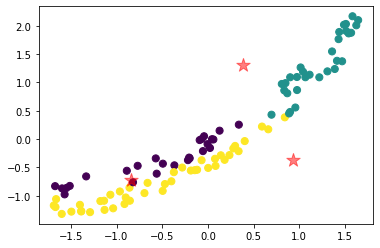

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
kmeans = My_KMeans(3,100)
kmeans.fit(X_std)
y_kmeans = kmeans.predict(X_std)



'''
X_std[:, 1]: X_std dataset with all rows and the second column (time_study in this case)
X_std[:, 2]: X_std dataset with all rows and the third column (marks in this case)
'''

# Plot cluster elements
plt.scatter(x=X_std[:, 1], y=X_std[:, 2], c=y_kmeans, s=50, cmap='viridis')


# Plot cluster centers
plt.scatter([x for x, _, _ in kmeans.centroids], [y for _, _, y in kmeans.centroids],marker='*', color='r', s=200, alpha=0.5)


### Your analysis about the plot

According to my inspection of the previous plot, both the points and clusters, as well as the centroid that was created, are not precise. Even if the model appears to be functioning OK, a few corrections should still need to be made. However, the model that is now being created may be applied since the outcomes are adequate.

### (Bonus 20pts) Modify your algorithm to k-means++ with a smart initialization, and repeat the task above

In [20]:
def get_kmeans_pp_centroids(X1,k = 5):
    centroids = []
    for i in range(k):
        centroids.append([X1[10,0],X1[10,1],X1[10,2]])
    i = 1
    d = []
    while i <= k:
        r = centroids[i-2 if i-2 >=0 else 0]
        maxd = 0
        for j in X1:
            d = np.sqrt((j[1] - r[1])**2 +(j[2] - r[2])**2)
            if d > maxd:
                centroids[i-1] = [j[0],j[1],j[2]]
                maxd = d
        i+=1
    min_, max_ = np.min(X1, axis=0), np.max(X1, axis=0)    
    iteration = 0   
    prev_centroids = None
        
    while np.not_equal(centroids, prev_centroids).any() and iteration < k:
        
        sorted_points = [[] for _ in range(k)]

        for x in X1:
            dists = euclidean(x, centroids)
            centroid_idx = np.argmin(dists)
            sorted_points[centroid_idx].append(x)
            
        prev_centroids = centroids
        centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
        for i, centroid in enumerate(centroids):
            if np.isnan(centroid).any():
                centroids[i] = prev_centroids[i]
        iteration += 1
    return centroids

def predict(X,c):
    centroids = []
    centroid_idxs = []
    for x in X:
        dists = euclidean(x,c)
        centroid_idx = np.argmin(dists)
        t = c[centroid_idx]
        centroids.append(t)
        centroid_idxs.append(centroid_idx)
    return centroid_idxs

/Users/roja/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/roja/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


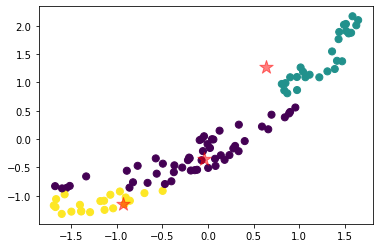

In [21]:
centroids = get_kmeans_pp_centroids(X_std, k = 3)
y_kmeans = predict(X_std,centroids)


# Plot cluster elements
plt.scatter(x=X_std[:, 1], y=X_std[:, 2], c=y_kmeans, s=50, cmap='viridis')


# Plot cluster centers
plt.scatter([x for x, _, _ in centroids], [y for _, _, y in centroids],marker='*', color='r', s=200, alpha=0.5)
